<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Chap -4- Machine learning applications/Clusturing/a-complete-guide-to-clustering-methods.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <center> A Complete Guide to Clustering Methods </center>



## Table of Contents

<a id="toc"></a>

- [1. Introduction](#1)
    - 1.1 What is clustering?
    - 1.2 How to find the clusters?
    - 1.3 Distances between clusters
    
    
- [2. Clustering Algorihtms](#3)
    - 2.1 Hierarchical Clustering
    - 2.2 K-Means Clustering
    - 2.3 K-Means++ Clustering
    

- [3. Example: Customer Churn Analysis](#4)
    - 3.1 Data Preprocess
    - 3.2 Tuning hyperparameters
    - 3.3 Clustering
    
    
- [4. Example: Hierarchical Clustering](#4)
    - 4.1 Data Preprocess
    - 4.2 Tuning hyperparameters
    - 4.3 Clustering 

<a id="1"></a>

# <center>Introduction</center>

## What is clustering?

**`Clustering`** is an **unsupervised** technique used when the data doesn't have a **natrual output variable** for us to predict. 

Instead of **finding the relationships** between the input and output variables (like **supervised learning** does), clustering **splits** the data into different **clusters** where the data in each cluster is **as similar as possible**. For example, **clustering customers** based on location:

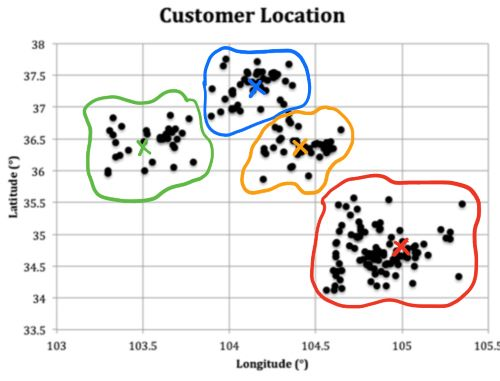

## How to find the clusters?

**Clustering** is all about measuring **distances** between data points. **Closer** the distances between data points, **higher the similarity** between them.

We have mentioned distance calculation in the notebook [A Complete Guide to K-Nearest Neighbours](https://www.kaggle.com/code/ryanluoli2/a-complete-guide-to-k-nearest-neighbours). Here we do a quick recap on the **3 common ways** in calculating **distances** between data points:

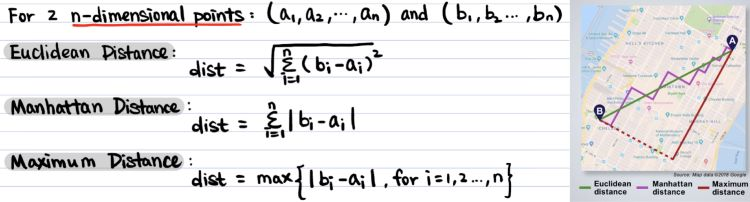

With the distances calculated, we can find the data points that are **close to each other** and group them into a cluster. In the end, we want to form clusters that are as **far away from each other** as possible. How do we evaluate this?

## Distances between clusters

There are **5 different methods** in calculating **distances between clusters**:

1. **`Minimum Distance`**: the **minimum** distance between the two points from each cluster
2. **`Maximum Distance`**: the **maximum** distance between the two points from each cluster
3. **`Average Distance`**: the **average** distance of all the combinations of two points from each cluster
4. **`Centroid Distance`**: the distance between the **centroids** of the two clusters
5. **`Ward's Method`**: talk about this later...

Hard to imagine? Let me show you some **visualizations**:

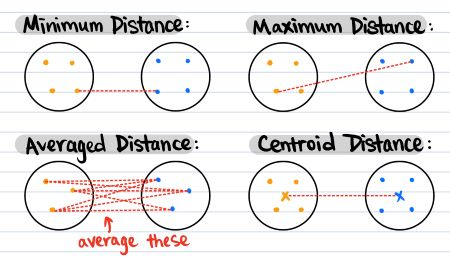

Now you know what these distances look like, let's also get familiar with their **formulas**:

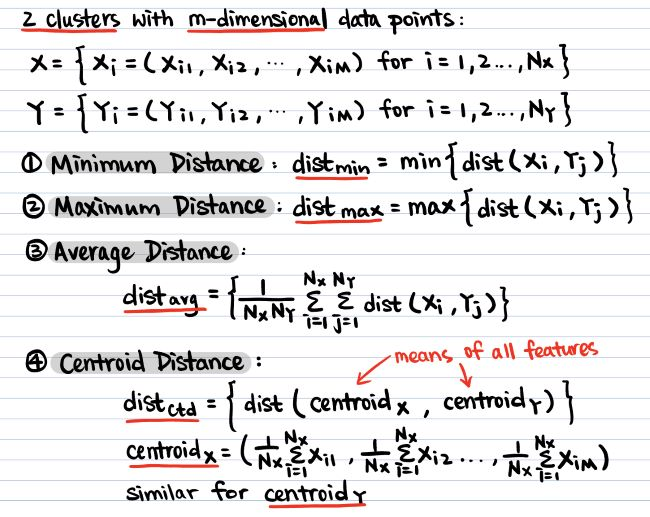

These methods have their own advantages and disadvantages but typically we can choose the **suitable method** based on the **shape of the clusters**:

1. If the clusters are **round shaped**: maximum distance
2. If the clusters are **long and stretched**: minimum distance

Now you know how to calculate the **distances between data points and clusters**, let's have a look at some popular **clustering algorithms**.

<a id="2"></a>

# <center>Clustering Algorithm</center>

## Hierarchical Clustering

**`Hierarchical Clustering`** is a **greedy algorithm** that starts with every data point represents a cluster and **iteratively merging** clusters until there are only **2 clusters** left. This is also called the **Agglomerative Hierarchical Clustering**.

Let me show you what this means with the following diagram:

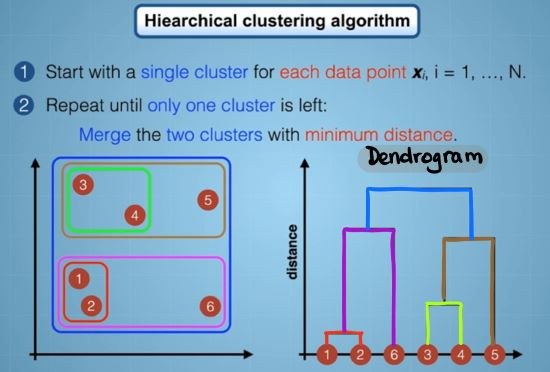

As demonstrated above, the algorithm starts with every **single data point** represents a cluster. It then **merges the 2 closest clusters** into a single cluster(red square containing points 1 and 2). It **repeats** this step until there are only **2 clusters** left (**red->green->brown->purple->blue**). 

This method is known as the **Ward's method** or more precisely the **Ward's minimum variance method**. This method intends to cluster data points in a way that **minimizes the variance** of the data points within a cluster.

The diagram on the right of the above image is call a **dendrogram** which shows the complete **merging steps** of the clusters. We can draw a **horizontal line** on this diagram to obtain our clusters, for example, the following line gives us **4 clusters** (1&2, 6, 3&4, 5).

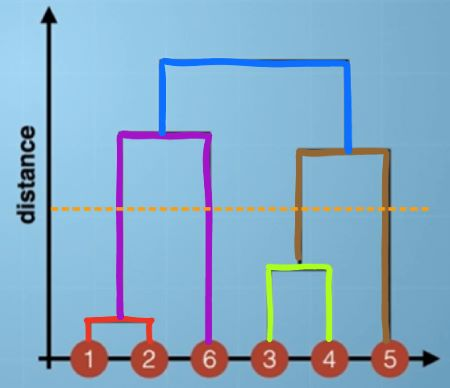

**Hierarchical clustering** is **easy to understand** and the results are **easy to interpret**. However, it is **myopic**.

The algorithm always finds the **2 closest clusters at each step** which is a **local optimal** but not a **global optimal**. This is the same problem that a **decision tree** when it is choosing the **best split at each node**.

Let me show you what this will lead to with an example of **customer clustering**:

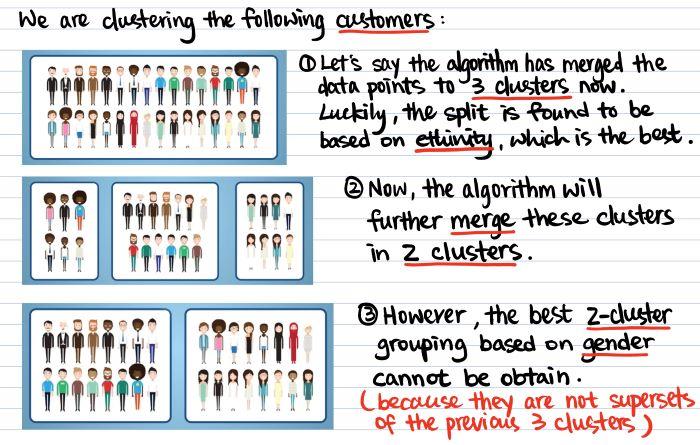

## K-Means Clustering

**`K-Means Clustering`** clusters data points by **iteratively assigning** them to the **closest cluster** (centroid) which **changes over time** based on the data points assigned to it. (**k** indicates the **number of clusters**)

Let me show you how this is done with the example of a **3-means clustering**:

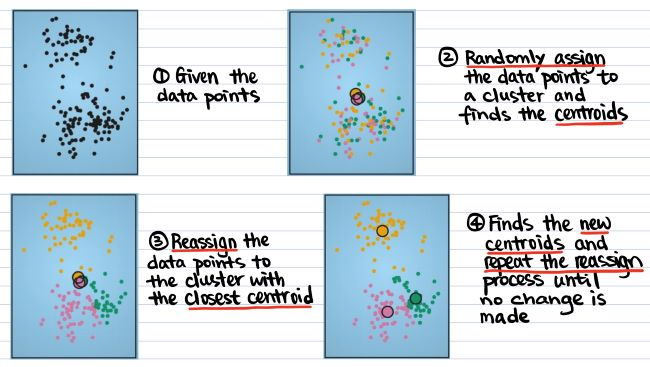

As demonstrated above, the algorithm first **randomly assigns** the data points to the **3 clusters**. Following, it finds the **centroids** of these 3 clusters. Then, it **reassigns** the data points to the **closest cluster (centroid)**. The algorithm **repeats** this step until there is **no more change** made. With such a method, **k-means clustering** is **less intuitive** but **doesn't suffer from myopic decisions** and often achieve **better results**. 

There is big difference between the 2 algorithms: **hierarchical clustering** choose the **number of clusters** after the data points are grouped while **k-means clustering** requires a **preset value of k**. But how do we know what is the **optimal number of clusters**? 

1. Domain knowledge
2. Practical constraints 
3. The **Elbow Chart**: choose the **turning point** that balance the trade-off between the **number of clusters** and **clusters' compactness**

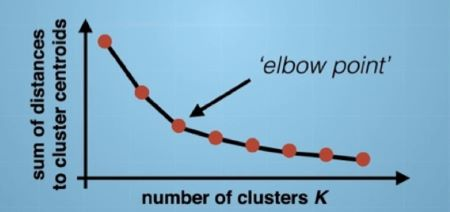

## K-Means++ Clustering

**`K-Means++ Clustering`** is the **improved version** of the k-means clustering algorithm.

In the initial stage of the **k-means clustering** algorithm, it assigns the data points **randomly** to a cluster. That is, it initializes the positions of the **cluster centroids** randomly. This **randomness** can lead in **suboptimal results**. 

This is avoid with the an **improved initialization method**:

1. The centroid of the first cluster is placed **randomly**.
2. The centroid of the next cluster is placed with a **probability proportional to the distance** of each point to its nearest cluster centroid.
3. This makes it likely for the next centroid to be placed **as far away from the already initialized centroids as possible**.

<a id="3"></a>

# <center>Example: Customer Churn Analysis</center>

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, normalize

### Import Data

In [45]:
df = pd.read_csv('Telco_Customer_Churn.csv')
y = df['Churn']
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
for col in df.columns:
   print(f"col:{col:-<20}", df[col].unique())

col:customerID---------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
col:gender-------------- ['Female' 'Male']
col:SeniorCitizen------- [0 1]
col:Partner------------- ['Yes' 'No']
col:Dependents---------- ['No' 'Yes']
col:tenure-------------- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
col:PhoneService-------- ['No' 'Yes']
col:MultipleLines------- ['No phone service' 'No' 'Yes']
col:InternetService----- ['DSL' 'Fiber optic' 'No']
col:OnlineSecurity------ ['No' 'Yes' 'No internet service']
col:OnlineBackup-------- ['Yes' 'No' 'No internet service']
col:DeviceProtection---- ['No' 'Yes' 'No internet service']
col:TechSupport--------- ['No' 'Yes' 'No internet service']
col:StreamingTV--------- ['No' 'Yes' 'No internet service']
col:StreamingMovies----- ['No' 'Yes' 'No int

<AxesSubplot:>

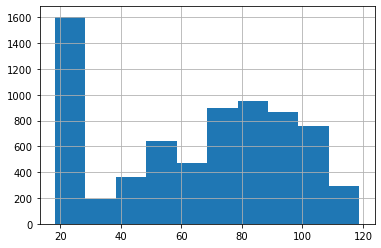

In [18]:
df['MonthlyCharges'].hist()

In [46]:
#convert the column values of TotalCharges to numerical
df.TotalCharges = df['TotalCharges'].replace(' ', '0', regex=True)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

<AxesSubplot:>

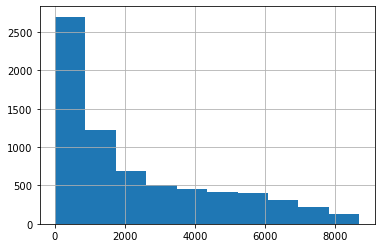

In [20]:
df['TotalCharges'].hist()

### Data Preprocess

In [47]:

#drop columns
df = df.drop(['customerID','Churn'], axis=1).copy()

#numerical and categorical variables
numerical_index = (df.dtypes != 'object')
numerical_features = list(numerical_index[numerical_index].index)
categorical_index = (df.dtypes == 'object')
categorical_features = list(categorical_index[categorical_index].index)

#standardize numerical variables
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#encode categorical variables
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

### K-Means++ Clustering

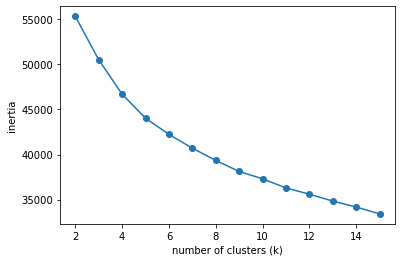

In [22]:
num_clusters = np.arange(2,16)
inertias = []

for k in num_clusters:
    model = KMeans(init='k-means++', n_clusters=k, random_state=0)
    model.fit(df)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.show()

From the above **elbow chart**, we can choose the **optimal k vlaue** as 4.

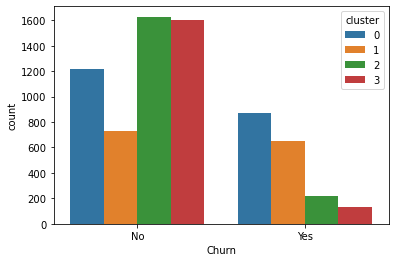

In [49]:
df = df.drop(['Churn'], axis=1).copy()
model = KMeans(init='k-means++', n_clusters=4, random_state=0)
model.fit(df)

df['cluster'] = model.predict(df)
df['Churn'] = y
sns.countplot(x='Churn', hue="cluster", data=df)
plt.show()

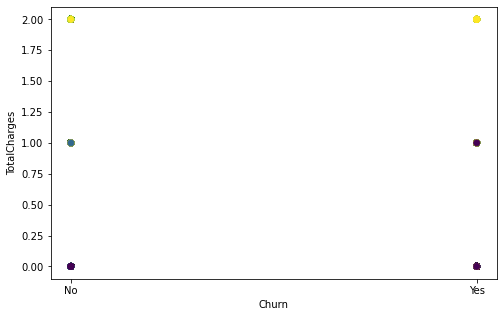

In [51]:

plt.figure(figsize=(8,5))  
plt.scatter(df['Churn'], df['Contract'], c=df['cluster']) 
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.show()

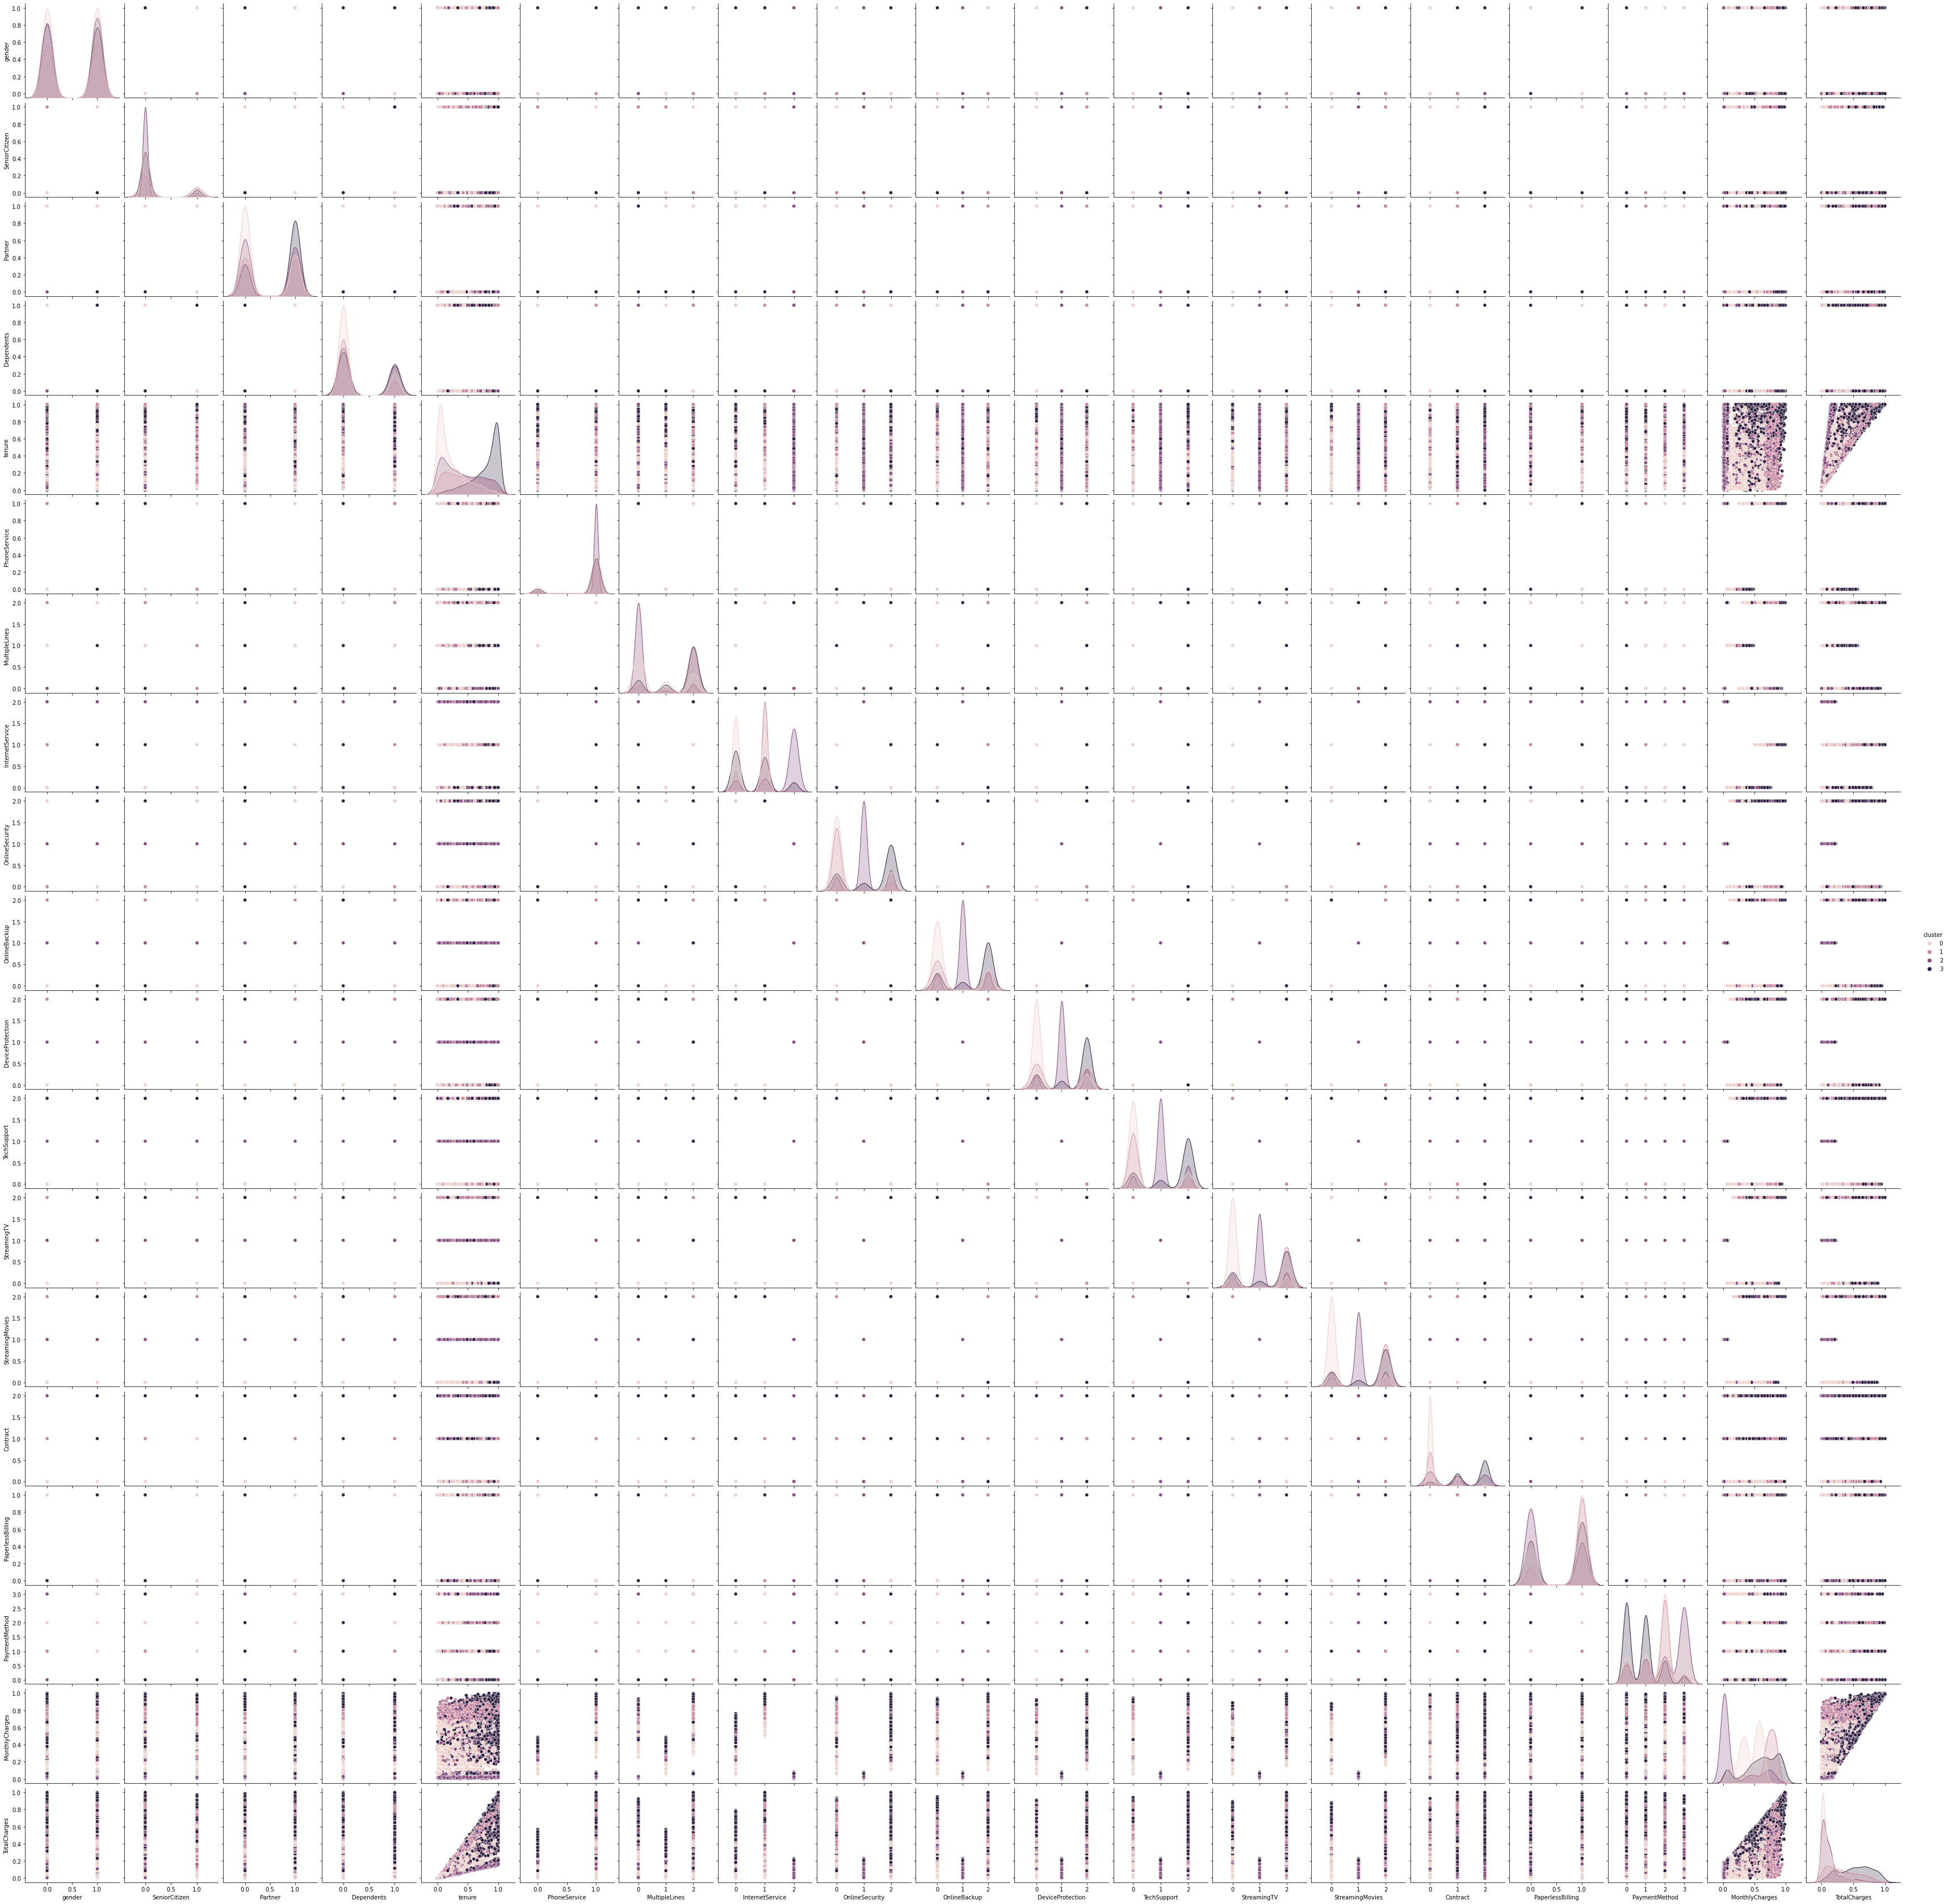

In [52]:
sns.pairplot(df,hue='cluster')

As we can see, the **k-means++ clustering** algorithm has clustered the customers into **4 different groups** with 2 groups having **high churn rates** and 2 groups having **low churn rates**.

<a id="4"></a>

# <center>Example: Hierarchical Clustering</center>

### Import Data

In [39]:
data = pd.read_csv('Wholesale_customers_data.csv')

### Data Preprocess

In [40]:
#normalize the data
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


### Dendrogram

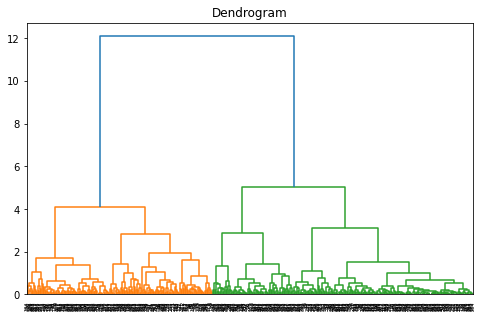

In [41]:
plt.figure(figsize=(8,5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The **vertical line** with **maximum distance** is the **blue line** and hence we can decide on a **threshold of 6** and **cut the dendrogram**.

**Larger** the vertical line, **better** the clustering results. (clusters are far away from each other)

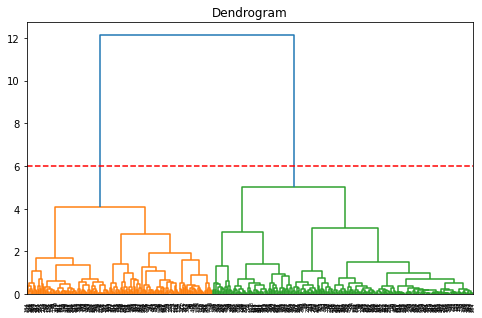

In [55]:
plt.figure(figsize=(8,5))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()

### Hierarchical Clustering

By cutting the dandrogram, we know the **optimal number of clusters** is 2 and here we use the **euclidean distances** between data points and the **ward's method** for distances between clusters.

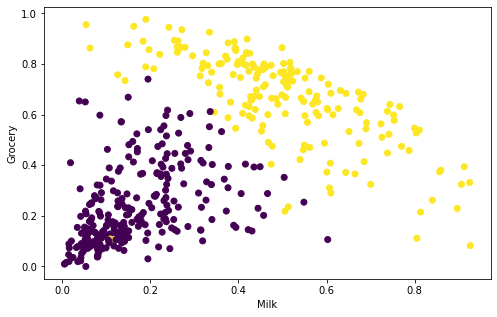

In [42]:
cluster = AgglomerativeClustering(n_clusters = 2, 
                                  affinity = 'euclidean',
                                  linkage = 'ward')  
cluster.fit(data_scaled)

plt.figure(figsize=(8,5))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.show()